Heart Disease is the current leading cause of death. I've selected two datasets that contain information on many patients' health. The purpose of this project is to predict if a patient has heart disease or not. We will explore the many different factors such as age, cholesterol, ECG/EKG, etc. and utilize machine learning techniques create a model that can yield accurate results. 

In [46]:
import project_functions as pf



df = pf.setup_sample()
blood_pressusre_df = pf.blood_pressure(df)

In [47]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [48]:
# Number of heart disease patients and non-heart disease patients
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Percentage of heart disease patients if their blood pressure is over 120.

In [49]:
base = 120 # For 120/80 blood pressure
data = blood_pressusre_df[blood_pressusre_df["trestbps"] > base]
total = len(data.index)
count = len(data[data["target"] == 1].index)
percentage = float("%.2f"%(count/total))*100
print(f"In the dataset, {percentage}% of patients with a blood pressure over 120 have heart disease.")

In the dataset, 51.0% of patients with a blood pressure over 120 have heart disease.


We will use scikit-learn to create training and testing data.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2) # random state default at 2, changing could affect convergence.
print(f"These are the sizes of the original data, training data, and testing data by rows and columns: {x.shape, x_train.shape, x_test.shape}.")

These are the sizes of the original data, training data, and testing data by rows and columns: ((303, 13), (242, 13), (61, 13)).


We will use logistic regression to compare the accuarcy of the data with and without scalar. We will first startoff without scalar. We will set max iterations to 2000 to make sure the data converges.

In [51]:
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)


LogisticRegression(max_iter=2000)

Now we can evaluate our model.

In [52]:
x_pred_train = model.predict(x_train)
train_accuracy = accuracy_score(x_pred_train, y_train)
train_percentage = float("%.2f"%(train_accuracy))*100

print(x_pred_train)
print(f"Training Accuracy: {train_accuracy}")
print(f"The results yielded a {train_percentage}% accuarcy rate from the training data.")

[0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0
 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1
 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0]
Training Accuracy: 0.8305785123966942
The results yielded a 83.0% accuarcy rate from the training data.


In [53]:
x_pred_test = model.predict(x_test)
test_accuracy = accuracy_score(x_pred_test, y_test)
test_percentage = float("%.2f"%(test_accuracy))*100

print(x_pred_test)
print(f"Testing Accuracy: {test_accuracy}")
print(f"The results yielded a {test_percentage}% accuarcy rate from the testing data.")

[1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0]
Testing Accuracy: 0.8852459016393442
The results yielded a 89.0% accuarcy rate from the testing data.


Based on our training and testing data, the accuarcy is almost the same. Now we can use this model on another dataset.

In [54]:
test_df = pf.setup_test()
test_x = test_df.drop('target', axis=1)
test_y = test_df['target']
prediction_res = model.predict(test_x)
final_accuracy = accuracy_score(prediction_res, test_y)
final_percentage = float("%.2f"%(final_accuracy))*100

print(prediction_res)
print(f"Final Accuracy: {final_accuracy}")
print(f"The results yielded a {final_percentage}% accuarcy rate from the testing data.")


[0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0
 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 

We can also show the confusion matrix of the true and predicted data. The confusion matrix shows the performance of the classification algorithm. It sums up the amount of correct and incorrect predictions. It shows how many values were true positives, true negatives, false positives, and false negatives.

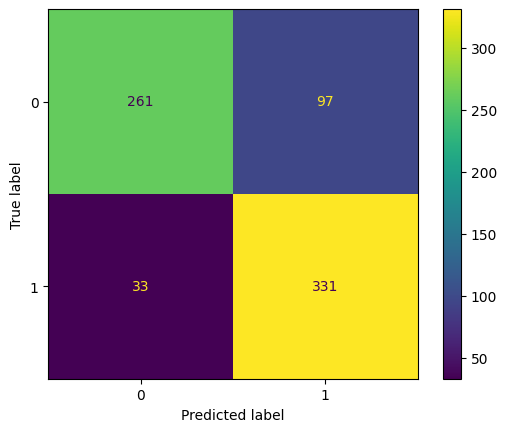

In [55]:
matrix = confusion_matrix(test_y, prediction_res, labels=None, sample_weight=None, normalize=None)
disp = ConfusionMatrixDisplay(matrix)
disp.plot()
plt.show()